<a href="https://colab.research.google.com/github/jasmine400/nlp-/blob/main/mean_shift4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
%matplotlib inline
from mpl_toolkits import mplot3d
import random
import plotly.express as px
from statistics import mean

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/clustering
!ls

/content/gdrive/My Drive/Colab Notebooks/clustering
'CC GENERAL.csv'      k-means_3			 mean_shift3.ipynb
 clustering_2.ipynb   k-means_clustering.ipynb	 mean_shift4.ipynb
 dbscan_2.ipynb       mean_shift0.ipynb		 meanshift_5.ipynb
 dbscan.ipynb	      mean_shift1.ipynb		 scatterolpt.ipynb
 FLOWERDATA.txt       mean_shift2.ipynb


In [ ]:
  f = open('FLOWERDATA.txt', 'r');
  lines = f.read().splitlines();
  f.close();
  items = [];
  for i in range(1, len(lines)):
      line = lines[i].split(',');
      itemFeatures = [];
      for j in range(len(line)-1):
        v = float(line[j]);
        itemFeatures.append(v);
      items.append(itemFeatures);
print(items)
print(type(items))
for i in items:
    del i[3]

[[4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4.8, 3.0, 1.4, 0.3], [5.1, 3.8

In [ ]:
print(len(items))
visit=[0]*149
print(visit)

149
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
radius=1
kernle=(random.choice(items))
print("kernle is")
print(kernle)
x_centroid=kernle[0]
y_centroid=kernle[1]
z_centroid=kernle[2]
index_kernle=items.index(kernle)
print("index of kernle is ")
print(index_kernle)


kernle is
[5.5, 2.5, 4.0]
index of kernle is 
88


In [ ]:
dif=4
nei=False
firstCycle=False
cluster=1
while(all(visit)==False):
  indices=[]
  bandwith=[]
  #kernle_index=items.index(kernle)
  print(" kernle is")
  print(kernle)
  print("index of kernle is ")
  print(index_kernle)
  visit[index_kernle]=cluster
  print("cluster of kernle is")
  print(visit[index_kernle])
  bandwith.append(kernle)
  while (dif>0.05):
    for i in items:
      root_diff_x=(i[0]-x_centroid)**2
      root_diff_y=(i[1]-y_centroid)**2
      root_diff_z=(i[2]-z_centroid)**2
      distance = np.sqrt(root_diff_x + root_diff_y+root_diff_z)
      if distance>=radius:
        bandwith_index=items.index(i)
        if firstCycle==False:
          if visit[bandwith_index] !=0:
            nei=True
            firstCycle=True
            band_cluster=visit[bandwith_index]

        bandwith.append(i)
        visit[bandwith_index]=cluster
        indices.append(bandwith_index)
    if nei==True:
      for j in indices:
        visit[j]=band_cluster
        nei=False
        firstCycle=False
    print("visit is")
    print(visit)
    print("--------------------------------")
    X=[]
    Y=[]
    Z=[]
    for jx in bandwith:
      X.append(jx[0])
    for jy in bandwith:
      Y.append(jy[1])
    for jz in bandwith:
      Z.append(jz[2])
    X=mean(X)
    Y=mean(Y)
    Z=mean(Z)
    x11=(X-x_centroid)**2
    y11=(Y-y_centroid)**2
    z11=(Z-z_centroid)**2
    dif=np.sqrt(x11+y11+z11)
    x_centroid=X
    y_centroid=Y
    z_centroid=Z
  if all(visit)==False:
    unvisit=[]
    for h in range(len(visit)):
      if visit[h]==0:
        unvisit.append(h)
    index_kernle=(random.choice(unvisit))
    print("iiindex of kernle")
    print(index_kernle)
    kernle=items[index_kernle]
    print("kkkernle is")
    print(kernle)
    x_centroid=kernle[0]
    y_centroid=kernle[1]
    z_centroid=kernle[2]
    dif=4
    cluster=cluster+1








 kernle is
[5.5, 2.5, 4.0]
index of kernle is 
88
cluster of kernle is
1
visit is
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]
--------------------------------
visit is
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
clusters=set(visit)
print(clusters)
clusters=list(clusters)
print(clusters)
number_of_colors=len(clusters)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)

for ii in range(len(clusters)):
  x=[]
  y=[]
  z=[]
  i=clusters[ii]
  print(i)

  for j in range(len(visit)):
    if visit[j]==i:

      x.append(items[j][0])
      y.append(items[j][1])
      z.append(items[j][2])
  ax.scatter(x, y, z, c=color[ii], marker='o')
  print(x)
  print(y)
  print(z)
  print("-------------------")

In [ ]:
print(visit)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 6, 1, 1, 1, 1, 1]


[1, 2, 3, 4, 5, 6, 7]
['#7F2267', '#0566A4', '#8200CE', '#5AB070', '#3DDDEA', '#F04EFA', '#717A1F']
[4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 5.0, 5.5, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 5.1, 4.6, 5.3, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 6.8, 6.7, 6.3, 6.5, 6.2, 5.9]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0

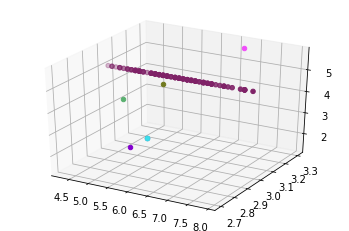

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
clusters=set(visit)
clusters=list(clusters)
print(clusters)

number_of_colors = len(clusters)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)


for i in range(len(clusters)):
  clu=[]
  x=[]
  y=[]
  z=[]
  for j in range(len(visit)):
    if visit[j]==clusters[i]:
      clu.append(items[j])
  for h in clu:
    x.append(h[0])
  for hh in clu:
    y.append(h[1])
  for hhh in clu:
    z.append(h[2])
  ax.scatter(x, y, z, c=color[i], marker='o')
  print(x)
  print(y)
  print(z)





[1, 6, 7, 8, 9, 10, 11]
['#194146', '#E1501B', '#740113', '#E0AE22', '#1F21AC', '#A43070', '#629D7E']
[4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 5.0, 5.5, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 5.1, 4.6, 5.3, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 6.8, 6.7, 6.3, 6.5, 6.2, 5.9]
[3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.2, 3.5, 3.0, 3

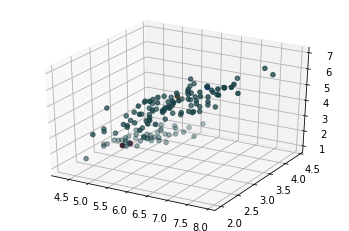

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
clusters=set(visit)
clusters=list(clusters)
print(clusters)

number_of_colors = len(clusters)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)


for ii in range(len(clusters)):
  i=clusters[ii]
  clu=[]
  x=[]
  y=[]
  z=[]
  for j in range(len(visit)):
    if visit[j]==i:
      x.append(items[j][0])
      y.append(items[j][1])
      z.append(items[j][2])
      clu.append(items[j])
  ax.scatter(x, y, z, c=color[ii], marker='o')
  print(x)
  print(y)
  print(z)




In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
clusters=set(visit)
print(clusters)
clusters=list(clusters)
print(clusters)
number_of_colors=len(clusters)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)

for i in range(len(clusters)):
  x=[]
  y=[]
  z=[]
  i=clusters[ii]
  print(i)

  for j in range(len(visit)):
    if visit[j]==i:

      x.append(items[j][0])
      y.append(items[j][1])
      z.append(items[j][2])
  ax.scatter(x, y, z, c=color[ii], marker='o')
  print(x)
  print(y)
  print(z)
  print("-------------------")